In [1]:
proj_path='/content/drive/MyDrive/S4 - 16824 VLR/generative-modeling/gan'

### Git Stuff

### Colab stuff

In [2]:
# one-time data set-up
# #!pip show "clean-fid"
# !cd "$proj_path/$hw_dir" && source "setup_data.sh"
# !ls "/usr/local/lib/python3.7/dist-packages/cleanfid"
# !mkdir "/usr/local/lib/python3.7/dist-packages/cleanfid/stats"
# !cd "$proj_path/$hw_dir/$tasks" && cp cub_clean_custom_na.npz "/usr/local/lib/python3.7/dist-packages/cleanfid/stats/cub_clean_custom_na.npz"

## Notebook

In [3]:
import sys, pathlib
sys.path.append('./gan')
sys.path.append('./vae')
%load_ext autoreload
%autoreload 2

### GAN

In [4]:
from gan.networks import *
from gan.train import *
from gan.q1_5 import compute_discriminator_loss, compute_generator_loss
from networks import Discriminator, Generator

/opt/conda/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


wandb: Currently logged in as: 3m-m. Use `wandb login --relogin` to force relogin


data dir exist:True
Epoch after iters:0


/opt/conda/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Epoch after iters:47
Epoch after iters:94
Epoch after iters:141
Epoch after iters:188
Epoch after iters:235
Epoch after iters:282
Epoch after iters:329
Epoch after iters:376
Epoch after iters:423
Epoch after iters:470
Epoch after iters:517
Epoch after iters:564
Epoch after iters:611
Epoch after iters:658
Epoch after iters:705
Epoch after iters:752
Epoch after iters:799
Epoch after iters:846
Epoch after iters:893
Epoch after iters:940
Epoch after iters:987
compute FID of a model with cub-32 statistics


FID model: 100%|███████████████████████████████████| 40/40 [01:40<00:00,  2.50s/it]


Iteration 1000 FID: 303.4748800386125
Epoch after iters:1034
Epoch after iters:1081
Epoch after iters:1128
Epoch after iters:1175
Epoch after iters:1222
Epoch after iters:1269
Epoch after iters:1316
Epoch after iters:1363
Epoch after iters:1410
Epoch after iters:1457
Epoch after iters:1504
Epoch after iters:1551
Epoch after iters:1598
Epoch after iters:1645
Epoch after iters:1692
Epoch after iters:1739
Epoch after iters:1786
Epoch after iters:1833
Epoch after iters:1880
Epoch after iters:1927
Epoch after iters:1974
compute FID of a model with cub-32 statistics


FID model: 100%|███████████████████████████████████| 40/40 [01:35<00:00,  2.39s/it]


Iteration 2000 FID: 283.1160136461291
Epoch after iters:2021
Epoch after iters:2068
Epoch after iters:2115
Epoch after iters:2162
Epoch after iters:2209
Epoch after iters:2256
Epoch after iters:2303
Epoch after iters:2350
Epoch after iters:2397
Epoch after iters:2444
Epoch after iters:2491
Epoch after iters:2538
Epoch after iters:2585
Epoch after iters:2632
Epoch after iters:2679
Epoch after iters:2726
Epoch after iters:2773
Epoch after iters:2820
Epoch after iters:2867
Epoch after iters:2914
Epoch after iters:2961
compute FID of a model with cub-32 statistics


FID model: 100%|███████████████████████████████████| 40/40 [01:35<00:00,  2.38s/it]


Iteration 3000 FID: 295.54228152654275
Epoch after iters:3008
Epoch after iters:3055
Epoch after iters:3102
Epoch after iters:3149
Epoch after iters:3196
Epoch after iters:3243
Epoch after iters:3290
Epoch after iters:3337
Epoch after iters:3384
Epoch after iters:3431
Epoch after iters:3478
Epoch after iters:3525
Epoch after iters:3572
Epoch after iters:3619
Epoch after iters:3666
Epoch after iters:3713
Epoch after iters:3760
Epoch after iters:3807
Epoch after iters:3854
Epoch after iters:3901
Epoch after iters:3948
Epoch after iters:3995
compute FID of a model with cub-32 statistics


FID model: 100%|███████████████████████████████████| 40/40 [01:33<00:00,  2.35s/it]


Iteration 4000 FID: 289.89028690142635
Epoch after iters:4042
Epoch after iters:4089
Epoch after iters:4136
Epoch after iters:4183
Epoch after iters:4230
Epoch after iters:4277
Epoch after iters:4324
Epoch after iters:4371
Epoch after iters:4418
Epoch after iters:4465
Epoch after iters:4512
Epoch after iters:4559
Epoch after iters:4606
Epoch after iters:4653
Epoch after iters:4700
Epoch after iters:4747
Epoch after iters:4794
Epoch after iters:4841
Epoch after iters:4888
Epoch after iters:4935
Epoch after iters:4982
compute FID of a model with cub-32 statistics


FID model: 100%|███████████████████████████████████| 40/40 [01:35<00:00,  2.39s/it]


Iteration 5000 FID: 286.1913587801345
Epoch after iters:5029
Epoch after iters:5076
Epoch after iters:5123
Epoch after iters:5170
Epoch after iters:5217
Epoch after iters:5264
Epoch after iters:5311
Epoch after iters:5358
Epoch after iters:5405
Epoch after iters:5452
Epoch after iters:5499
Epoch after iters:5546
Epoch after iters:5593
Epoch after iters:5640
Epoch after iters:5687
Epoch after iters:5734
Epoch after iters:5781
Epoch after iters:5828
Epoch after iters:5875
Epoch after iters:5922
Epoch after iters:5969
compute FID of a model with cub-32 statistics


FID model: 100%|███████████████████████████████████| 40/40 [01:35<00:00,  2.38s/it]


Iteration 6000 FID: 257.44686855315416
Epoch after iters:6016
Epoch after iters:6063
Epoch after iters:6110
Epoch after iters:6157
Epoch after iters:6204
Epoch after iters:6251
Epoch after iters:6298
Epoch after iters:6345
Epoch after iters:6392
Epoch after iters:6439
Epoch after iters:6486
Epoch after iters:6533
Epoch after iters:6580
Epoch after iters:6627
Epoch after iters:6674
Epoch after iters:6721
Epoch after iters:6768
Epoch after iters:6815
Epoch after iters:6862
Epoch after iters:6909
Epoch after iters:6956
compute FID of a model with cub-32 statistics


FID model: 100%|███████████████████████████████████| 40/40 [01:37<00:00,  2.43s/it]


Iteration 7000 FID: 273.60388066745617
Epoch after iters:7003
Epoch after iters:7050
Epoch after iters:7097
Epoch after iters:7144
Epoch after iters:7191
Epoch after iters:7238
Epoch after iters:7285
Epoch after iters:7332
Epoch after iters:7379
Epoch after iters:7426
Epoch after iters:7473
Epoch after iters:7520
Epoch after iters:7567
Epoch after iters:7614
Epoch after iters:7661
Epoch after iters:7708
Epoch after iters:7755
Epoch after iters:7802
Epoch after iters:7849
Epoch after iters:7896
Epoch after iters:7943
Epoch after iters:7990
compute FID of a model with cub-32 statistics


FID model: 100%|███████████████████████████████████| 40/40 [01:40<00:00,  2.51s/it]


Iteration 8000 FID: 253.08160555317977
Epoch after iters:8037
Epoch after iters:8084
Epoch after iters:8131
Epoch after iters:8178
Epoch after iters:8225
Epoch after iters:8272
Epoch after iters:8319
Epoch after iters:8366
Epoch after iters:8413
Epoch after iters:8460
Epoch after iters:8507
Epoch after iters:8554
Epoch after iters:8601
Epoch after iters:8648
Epoch after iters:8695
Epoch after iters:8742
Epoch after iters:8789
Epoch after iters:8836
Epoch after iters:8883
Epoch after iters:8930
Epoch after iters:8977
compute FID of a model with cub-32 statistics


FID model: 100%|███████████████████████████████████| 40/40 [01:40<00:00,  2.51s/it]


Iteration 9000 FID: 222.46747089243905
Epoch after iters:9024
Epoch after iters:9071
Epoch after iters:9118
Epoch after iters:9165
Epoch after iters:9212
Epoch after iters:9259
Epoch after iters:9306
Epoch after iters:9353
Epoch after iters:9400
Epoch after iters:9447
Epoch after iters:9494
Epoch after iters:9541
Epoch after iters:9588
Epoch after iters:9635
Epoch after iters:9682
Epoch after iters:9729
Epoch after iters:9776
Epoch after iters:9823
Epoch after iters:9870
Epoch after iters:9917
Epoch after iters:9964
compute FID of a model with cub-32 statistics


FID model: 100%|███████████████████████████████████| 40/40 [01:38<00:00,  2.45s/it]


Iteration 10000 FID: 230.98783257750404
Epoch after iters:10011
Epoch after iters:10058
Epoch after iters:10105
Epoch after iters:10152
Epoch after iters:10199
Epoch after iters:10246
Epoch after iters:10293
Epoch after iters:10340
Epoch after iters:10387
Epoch after iters:10434
Epoch after iters:10481
Epoch after iters:10528
Epoch after iters:10575
Epoch after iters:10622
Epoch after iters:10669
Epoch after iters:10716
Epoch after iters:10763
Epoch after iters:10810
Epoch after iters:10857
Epoch after iters:10904
Epoch after iters:10951
Epoch after iters:10998
compute FID of a model with cub-32 statistics


FID model: 100%|███████████████████████████████████| 40/40 [01:40<00:00,  2.52s/it]


Iteration 11000 FID: 237.8855639154402
Epoch after iters:11045
Epoch after iters:11092
Epoch after iters:11139
Epoch after iters:11186
Epoch after iters:11233
Epoch after iters:11280
Epoch after iters:11327
Epoch after iters:11374
Epoch after iters:11421
Epoch after iters:11468
Epoch after iters:11515
Epoch after iters:11562
Epoch after iters:11609
Epoch after iters:11656
Epoch after iters:11703
Epoch after iters:11750
Epoch after iters:11797
Epoch after iters:11844
Epoch after iters:11891
Epoch after iters:11938
Epoch after iters:11985
compute FID of a model with cub-32 statistics


FID model: 100%|███████████████████████████████████| 40/40 [01:39<00:00,  2.48s/it]


Iteration 12000 FID: 236.00555883290667
Epoch after iters:12032
Epoch after iters:12079
Epoch after iters:12126
Epoch after iters:12173
Epoch after iters:12220
Epoch after iters:12267
Epoch after iters:12314
Epoch after iters:12361
Epoch after iters:12408
Epoch after iters:12455
Epoch after iters:12502
Epoch after iters:12549
Epoch after iters:12596
Epoch after iters:12643
Epoch after iters:12690
Epoch after iters:12737
Epoch after iters:12784
Epoch after iters:12831
Epoch after iters:12878
Epoch after iters:12925
Epoch after iters:12972
compute FID of a model with cub-32 statistics


FID model: 100%|███████████████████████████████████| 40/40 [01:36<00:00,  2.42s/it]


Iteration 13000 FID: 250.18488218040497
Epoch after iters:13019
Epoch after iters:13066
Epoch after iters:13113
Epoch after iters:13160
Epoch after iters:13207
Epoch after iters:13254
Epoch after iters:13301
Epoch after iters:13348
Epoch after iters:13395
Epoch after iters:13442
Epoch after iters:13489
Epoch after iters:13536
Epoch after iters:13583
Epoch after iters:13630
Epoch after iters:13677
Epoch after iters:13724
Epoch after iters:13771
Epoch after iters:13818
Epoch after iters:13865
Epoch after iters:13912
Epoch after iters:13959
compute FID of a model with cub-32 statistics


FID model: 100%|███████████████████████████████████| 40/40 [01:36<00:00,  2.41s/it]


Iteration 14000 FID: 251.5919977933725
Epoch after iters:14006
Epoch after iters:14053
Epoch after iters:14100
Epoch after iters:14147
Epoch after iters:14194
Epoch after iters:14241
Epoch after iters:14288
Epoch after iters:14335
Epoch after iters:14382
Epoch after iters:14429
Epoch after iters:14476
Epoch after iters:14523
Epoch after iters:14570
Epoch after iters:14617
Epoch after iters:14664
Epoch after iters:14711
Epoch after iters:14758
Epoch after iters:14805
Epoch after iters:14852
Epoch after iters:14899
Epoch after iters:14946
Epoch after iters:14993
compute FID of a model with cub-32 statistics


FID model: 100%|███████████████████████████████████| 40/40 [01:37<00:00,  2.43s/it]


Iteration 15000 FID: 256.5246886998389
Epoch after iters:15040
Epoch after iters:15087
Epoch after iters:15134
Epoch after iters:15181
Epoch after iters:15228
Epoch after iters:15275
Epoch after iters:15322
Epoch after iters:15369
Epoch after iters:15416
Epoch after iters:15463
Epoch after iters:15510
Epoch after iters:15557
Epoch after iters:15604
Epoch after iters:15651
Epoch after iters:15698
Epoch after iters:15745
Epoch after iters:15792
Epoch after iters:15839
Epoch after iters:15886
Epoch after iters:15933
Epoch after iters:15980
compute FID of a model with cub-32 statistics


FID model: 100%|███████████████████████████████████| 40/40 [01:37<00:00,  2.44s/it]


Iteration 16000 FID: 247.481900302013
Epoch after iters:16027
Epoch after iters:16074
Epoch after iters:16121
Epoch after iters:16168
Epoch after iters:16215
Epoch after iters:16262
Epoch after iters:16309
Epoch after iters:16356
Epoch after iters:16403
Epoch after iters:16450
Epoch after iters:16497
Epoch after iters:16544
Epoch after iters:16591
Epoch after iters:16638
Epoch after iters:16685
Epoch after iters:16732
Epoch after iters:16779
Epoch after iters:16826
Epoch after iters:16873
Epoch after iters:16920
Epoch after iters:16967
compute FID of a model with cub-32 statistics


FID model: 100%|███████████████████████████████████| 40/40 [01:37<00:00,  2.44s/it]


Iteration 17000 FID: 248.93717989137713
Epoch after iters:17014
Epoch after iters:17061
Epoch after iters:17108
Epoch after iters:17155
Epoch after iters:17202
Epoch after iters:17249
Epoch after iters:17296
Epoch after iters:17343
Epoch after iters:17390
Epoch after iters:17437
Epoch after iters:17484
Epoch after iters:17531
Epoch after iters:17578
Epoch after iters:17625
Epoch after iters:17672
Epoch after iters:17719
Epoch after iters:17766
Epoch after iters:17813
Epoch after iters:17860
Epoch after iters:17907
Epoch after iters:17954
compute FID of a model with cub-32 statistics


FID model: 100%|███████████████████████████████████| 40/40 [01:36<00:00,  2.42s/it]


Iteration 18000 FID: 258.765068282462
Epoch after iters:18001
Epoch after iters:18048
Epoch after iters:18095
Epoch after iters:18142
Epoch after iters:18189
Epoch after iters:18236
Epoch after iters:18283
Epoch after iters:18330
Epoch after iters:18377
Epoch after iters:18424
Epoch after iters:18471
Epoch after iters:18518
Epoch after iters:18565
Epoch after iters:18612
Epoch after iters:18659
Epoch after iters:18706
Epoch after iters:18753
Epoch after iters:18800
Epoch after iters:18847
Epoch after iters:18894
Epoch after iters:18941
Epoch after iters:18988
compute FID of a model with cub-32 statistics


FID model: 100%|███████████████████████████████████| 40/40 [01:36<00:00,  2.40s/it]


Iteration 19000 FID: 257.95172308762153
Epoch after iters:19035
Epoch after iters:19082
Epoch after iters:19129
Epoch after iters:19176
Epoch after iters:19223
Epoch after iters:19270
Epoch after iters:19317
Epoch after iters:19364
Epoch after iters:19411
Epoch after iters:19458
Epoch after iters:19505
Epoch after iters:19552
Epoch after iters:19599
Epoch after iters:19646
Epoch after iters:19693
Epoch after iters:19740
Epoch after iters:19787
Epoch after iters:19834
Epoch after iters:19881
Epoch after iters:19928
Epoch after iters:19975
compute FID of a model with cub-32 statistics


FID model: 100%|███████████████████████████████████| 40/40 [01:35<00:00,  2.39s/it]


Iteration 20000 FID: 245.8469877680037
Epoch after iters:20022
Epoch after iters:20069
Epoch after iters:20116
Epoch after iters:20163
Epoch after iters:20210
Epoch after iters:20257
Epoch after iters:20304
Epoch after iters:20351
Epoch after iters:20398
Epoch after iters:20445
Epoch after iters:20492
Epoch after iters:20539
Epoch after iters:20586
Epoch after iters:20633
Epoch after iters:20680
Epoch after iters:20727
Epoch after iters:20774
Epoch after iters:20821
Epoch after iters:20868
Epoch after iters:20915
Epoch after iters:20962
compute FID of a model with cub-32 statistics


FID model: 100%|███████████████████████████████████| 40/40 [01:37<00:00,  2.43s/it]


Iteration 21000 FID: 254.40076284870898
Epoch after iters:21009
Epoch after iters:21056
Epoch after iters:21103
Epoch after iters:21150
Epoch after iters:21197
Epoch after iters:21244
Epoch after iters:21291
Epoch after iters:21338
Epoch after iters:21385
Epoch after iters:21432
Epoch after iters:21479
Epoch after iters:21526
Epoch after iters:21573
Epoch after iters:21620
Epoch after iters:21667
Epoch after iters:21714
Epoch after iters:21761
Epoch after iters:21808
Epoch after iters:21855
Epoch after iters:21902
Epoch after iters:21949
Epoch after iters:21996
compute FID of a model with cub-32 statistics


FID model: 100%|███████████████████████████████████| 40/40 [01:36<00:00,  2.42s/it]


Iteration 22000 FID: 228.1314999228741
Epoch after iters:22043
Epoch after iters:22090
Epoch after iters:22137
Epoch after iters:22184
Epoch after iters:22231
Epoch after iters:22278
Epoch after iters:22325
Epoch after iters:22372
Epoch after iters:22419
Epoch after iters:22466
Epoch after iters:22513
Epoch after iters:22560
Epoch after iters:22607
Epoch after iters:22654
Epoch after iters:22701


OSError: [Errno 12] Cannot allocate memory

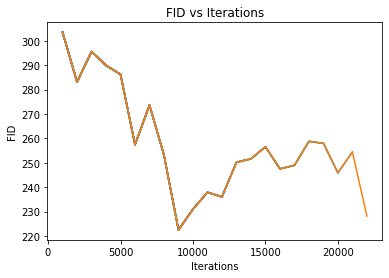

In [5]:
gen = Generator().cuda().to(memory_format=torch.channels_last)
disc = Discriminator().cuda().to(memory_format=torch.channels_last)
#prefix = "data_gan/"
prefix = "data_wgan_gp/"
os.makedirs(prefix, exist_ok=True)
# TODO 1.3.2: Run this line of code.
train_model(
    gen,
    disc,
    num_iterations=int(3e4),
    batch_size=256,
    prefix=prefix,
    gen_loss_fn=compute_generator_loss,
    disc_loss_fn=compute_discriminator_loss,
    log_period=1000,
    wandb_logging=True
)

In [ ]:
print('done')

In [ ]:
Image.open("data_ls_gan/"+"samples_{}.png".format(1000))

### VAE

In [ ]:
from vae.model import AEModel, VAEEncoder
from vae.train import vae_loss, main
#from vae.utils import compute_discriminator_loss, compute_generator_loss
#from networks import Discriminator, Generator

In [ ]:
x = torch.randn((2,)+input_shape)
model = AEModel(variational=True, latent_size=128, input_shape = (3, 32, 32))
mu, logvar = model.encoder(x)
print(mu.size(), logvar.size())
print(model.decoder(torch.randn(2, 128)).size())
print(vae_loss(model, x))

In [ ]:
import argparse 
def parse_a2c_arguments():
    # Command-line flags are defined here.
    parser = argparse.ArgumentParser()
    parser.add_argument('--latent_size', dest='latent_size', type=int,
                        default=1024, help="Size of latent space")   # 'LunarLander-v2'
    parser.add_argument('--num_epochs', dest='num_epochs', type=int,
                        default=20, help="Size of latent space")   # 'LunarLander-v2'
    parser.add_argument('--loss_mode', dest='loss_mode', type=str,
                        default='ae', help="Size of latent space")   # 'LunarLander-v2'
    parser.add_argument('--log_dir', dest='log_dir', type=str,
                        default='ae_latent1024', help="directory")
    # ['ae_latent1024','vae_latent1024', 'vae_latent1024_beta_constant0.8','vae_latent1024_beta_linear1']
    parser.add_argument('--beta_mode', dest='beta_mode', type=str,
                        default='constant', help="directorye")   
    # ['constant', 'linear']
    parser.add_argument('--target_beta_val', dest='target_beta_val', type=float,
                        default=0.8, help="final beta")   # 
    # [0.8. 1]
    return parser.parse_known_args()[0]  #parser.parse_args()
args = parse_a2c_arguments()
print(args)

In [ ]:
main(*args.__dict__)